In [3]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

# Data Science: Feature Preprocessing and Engineering

Let's work with the boston data set:

In [23]:
boston = load_boston()

X, y = boston.data, boston.target

In [22]:
print(boston.DESCR[296:1350])

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and 

## Features against Target ($X_i \, vs \, y$)

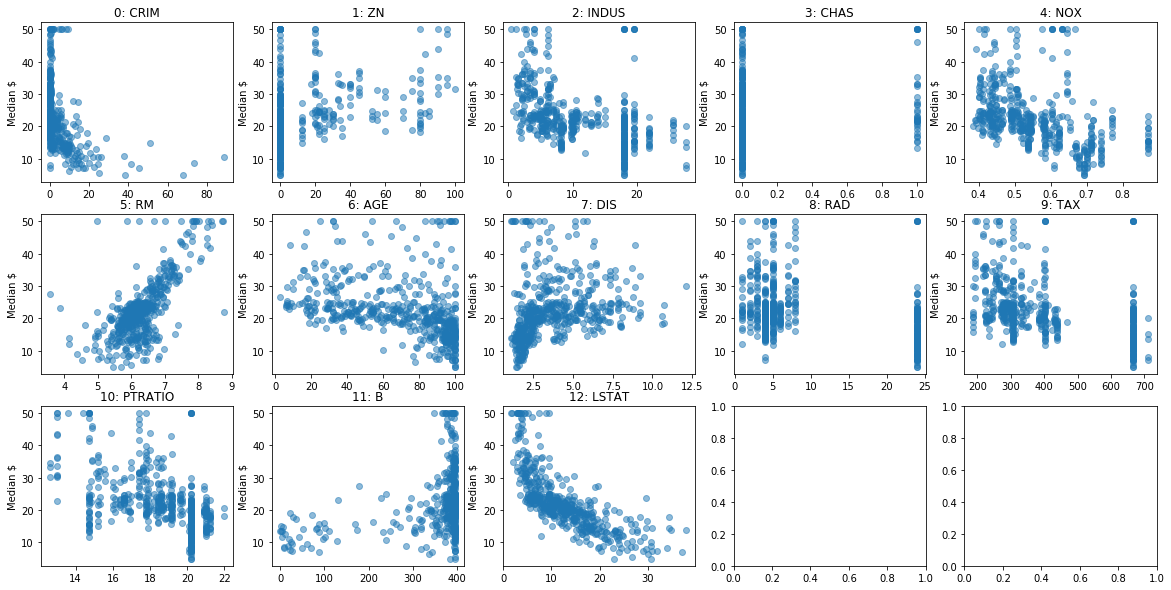

In [30]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

for i, ax in enumerate(axes.ravel()):
    if i > 12:
        break
        
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title(f"{i}: {boston.feature_names[i]}")
    ax.set_ylabel("Median $")

## Feature Distributions

* Current feature distributions:
    * Note their *scales*
    * Which are non-normal?

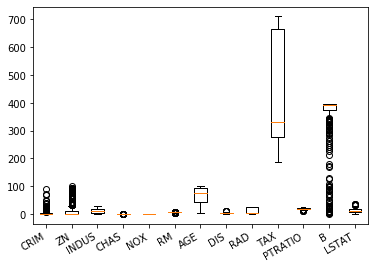

In [37]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right");

# Scaling

## Why Scaling?

* Simulate a data set:

In [55]:
X, y = make_blobs(centers=2, random_state=4, n_samples=30)
X = X * np.array([1000, 1])

y[7] = 0
y[27] = 0

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='kd_tree').fit(X, y)

In [80]:
from sklearn.preprocessing import scale

X_scaled = scale(X)
knn_scaled = KNeighborsClassifier(algorithm='kd_tree').fit(X_scaled, y)

* Scale to mean centre and unit varience:

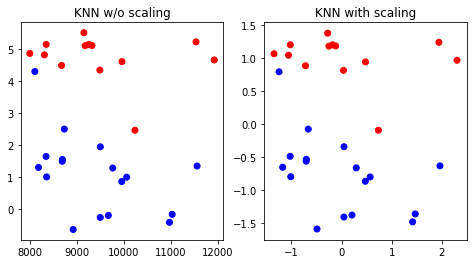

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
axes[0].set_title("KNN w/o scaling");
axes[1].set_title("KNN with scaling")
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr');

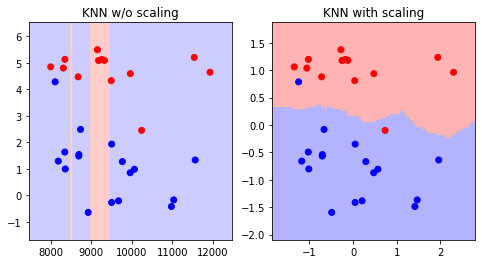

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
axes[0].set_title("KNN w/o scaling");
axes[1].set_title("KNN with scaling")
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr')

plot_2d_classification(knn, X, ax=axes[1], alpha=0)
plot_2d_classification(knn_scaled, X_scaled, ax=axes[1], alpha=0)
plot_2d_classification(knn, X, ax=axes[0], alpha=.2)
plot_2d_classification(knn_scaled, X_scaled, ax=axes[1], alpha=.3);

* The vertical feature is *ignored* without scaling! 
    * The horizontal feature is "far more important" given the initial scales. 
    
* The verticle feature is *the most classifying* so this is a catastrophie!
    

## Example Scalers

* What is the effect of scaling?

In [38]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

In [48]:
from sklearn.datasets import make_blobs

Xb, yb = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)

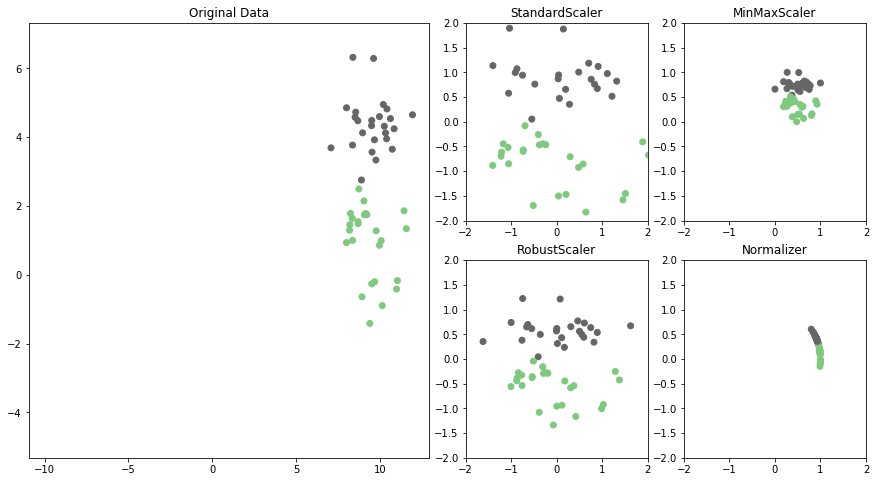

In [53]:
plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(Xb[:, 0], Xb[:, 1], c=yb, cmap="Accent")
maxx = np.abs(Xb[:, 0]).max()
maxy = np.abs(Xb[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")

other_axes = [plt.subplot2grid((2, 4), (i, j)) for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                   MinMaxScaler(), Normalizer(norm='l2')]):
    
    
    Xb_ = scaler.fit_transform(Xb)
    
    
    ax.scatter(Xb_[:, 0], Xb_[:, 1], c=yb, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

## Sklearn API so far..

* Estimators
    * aka. models
    
* Fit:
    * all estimators provide method
    * may not perform task
    * or, provides parameters for estimator
    * `estimator.fit(X, y)`, `estimator.fit(X)`
    
* Transform:
    * provided by unsupervised methods, transformations, feature engineering models
    * applies model (/technique) to the data using parameters established by `.fit()`
        * returns *transformed* X
    * `estimator.transform(X)`
    
* Predict:
    * provided by supervised ML models
    * applys model using parameters established by `.fit()` returns a `y` 
    * `estimator.predict(X)`
    
* Shortcuts:
    * `e.predict_transform()`
    * `e.fit_transform()`
    

# Pipelines

We'll perform a single split into test/train subsets to provide a rough check on the quality of our methods. 

In [95]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

* Without a pipeline
    1. fit scalers on *training*
    2. apply to train and test
    3. predit & score

In [96]:
from sklearn.linear_model import Ridge

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Ridge().fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.6345884564889054

* With pipeline:
    * fit/transform/predict all applied at correct stages

In [97]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), Ridge())

pipe.fit(X_train, y_train).score(X_test, y_test)

0.6345884564889054

* Pipelines also prevent mistakes in cross validation

### Information (/Data) Leakage in Cross Validation (TODO)

* Nested Cross Validation
* When not using pipelines it can often be the case that test data is transformed 

### Utiltiy Fns

In [78]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):
    # multiclass                                                                  
    if eps is None:                                                               
        eps = X.std(axis=0) / 2.
    else:
        eps = np.array([eps, eps])

    if ax is None:                                                                
        ax = plt.gca()                                                            

    x_min, x_max = X[:, 0].min() - eps[0], X[:, 0].max() + eps[0]
    y_min, y_max = X[:, 1].min() - eps[1], X[:, 1].max() + eps[1]
    # these should be 1000 but knn predict is unnecessarily slow
    xx = np.linspace(x_min, x_max, 100)                                          
    yy = np.linspace(y_min, y_max, 100)                                          

    X1, X2 = np.meshgrid(xx, yy)                                                  
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                        
    decision_values = classifier.predict(X_grid)
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,            
                                                       y_min, y_max),             
            aspect='auto', origin='lower', alpha=alpha, cmap=plt.cm.bwr)          